### Contents

- [EDA](#EDA)

### Header

In [1]:
# user configuration

In [2]:
# import libraries

# maths
import numpy as np
import pandas as pd

# visual
#from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pydotplus

# modelling
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.externals.six import StringIO 

# Others
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# file paths

folder = 'fitrec/'

input_path = '../data/1_input/' + folder
clean_path = '../data/2_clean/' + folder
preprocess_path = '../data/3_preprocess/' + folder
output_path = '../data/4_output/' + folder

### Import Data

In [4]:
# import data

file = 'endomondoHR_proper_summary.csv'
in_path = clean_path + file

df = pd.read_csv(in_path)

### Functions

### Pre-process Data

In [5]:
print(len(df))

cond_1 = df['hr_avg'] > 60
cond_2 = df['hr_min'] > 0
cond_3 = df['hr_q1'] > 0
cond_4 = df['hr_q3'] > 0
cond_5 = df['hr_max'] > 0

df = df[cond_1 & cond_2 & cond_3 & cond_4 & cond_5]

print(len(df))

167783
167220


In [6]:
print(len(df))
df.dropna(subset=['spd_avg'],inplace=True)
print(len(df))

167220
31672


In [7]:
df.columns

Index(['id', 'userId', 'gender', 'sport', 'time_start', 'time_end', 'time_dur',
       'lat_start', 'lat_end', 'lon_start', 'lon_end', 'alt_avg', 'alt_min',
       'alt_q1', 'alt_q3', 'alt_max', 'hr_avg', 'hr_min', 'hr_q1', 'hr_q3',
       'hr_max', 'spd_avg', 'spd_min', 'spd_q1', 'spd_q3', 'spd_max'],
      dtype='object')

In [8]:
df['sport'].value_counts()

bike                       17093
run                        11532
bike (transport)            1047
mountain bike               1012
indoor cycling               750
walk                         102
fitness walking               30
cross-country skiing          29
core stability training       20
roller skiing                 19
skate                         12
orienteering                  11
kayaking                      10
hiking                         4
horseback riding               1
Name: sport, dtype: int64

In [9]:
df['sport'].replace('treadmill running','run',inplace=True)
df['sport'].replace(['treadmill walking','fitness walking'],'walk',inplace=True)
df['sport'].replace(['bike','mountain bike','bike (transport)','indoor cycling'],'cycle',inplace=True)
df['sport'].replace(['windsurfing','kite surfing'],'surfing',inplace=True)
df['sport'].replace(['cross-country skiing','downhill skiing','roller skiing'],'skiing',inplace=True)
df['sport'].replace('pilates','yoga',inplace=True)

In [10]:
df['sport'].value_counts()

cycle                      19902
run                        11532
walk                         132
skiing                        48
core stability training       20
skate                         12
orienteering                  11
kayaking                      10
hiking                         4
horseback riding               1
Name: sport, dtype: int64

In [11]:
# cols = ['sport', 'time_dur', 'alt_avg', 'alt_min', 'alt_q1', 'alt_q3',
#        'alt_max', 'hr_avg', 'hr_min', 'hr_q1', 'hr_q3', 'hr_max']
#cols = ['sport','hr_avg', 'hr_min', 'hr_q1', 'hr_q3', 'hr_max']
cols = ['sport','hr_avg', 'hr_min', 'hr_q1', 'hr_q3', 'hr_max','spd_avg', 'spd_min', 'spd_q1', 'spd_q3', 'spd_max']

df_model = df[cols]

In [12]:
count = df_model['sport'].value_counts()

count_cond = count[count > 1].index
#count_cond = count[count >= 5].index
#count_cond = count[count >= 10].index
#count_cond = count[count >= 50].index
#count_cond = count[count >= 100].index

count_mask = df_model['sport'].isin(count_cond)
df_model = df_model[count_mask]

In [13]:
print(df_model.shape)
df_model.head()

(31671, 11)


,sport,hr_avg,hr_min,hr_q1,hr_q3,hr_max,spd_avg,spd_min,spd_q1,spd_q3,spd_max
0,cycle,152.650,100.0,146.0,160.0,177.0,26.162158,3.8592,19.8972,31.7313,57.4596
1,cycle,147.710,100.0,140.0,156.0,174.0,27.218369,8.0820,21.8106,31.9257,54.7704
2,cycle,140.554,99.0,133.0,149.0,168.0,26.050774,0.0000,20.5992,31.0365,59.2092
3,cycle,147.020,99.0,140.0,155.0,178.0,26.877838,4.3272,21.4848,31.2651,57.9852
6,cycle,166.084,118.0,162.0,174.0,185.0,29.592281,7.2180,23.7726,35.2998,50.9724


In [14]:
df_model['sport'].value_counts()

cycle                      19902
run                        11532
walk                         132
skiing                        48
core stability training       20
skate                         12
orienteering                  11
kayaking                      10
hiking                         4
Name: sport, dtype: int64

### Plot df_model

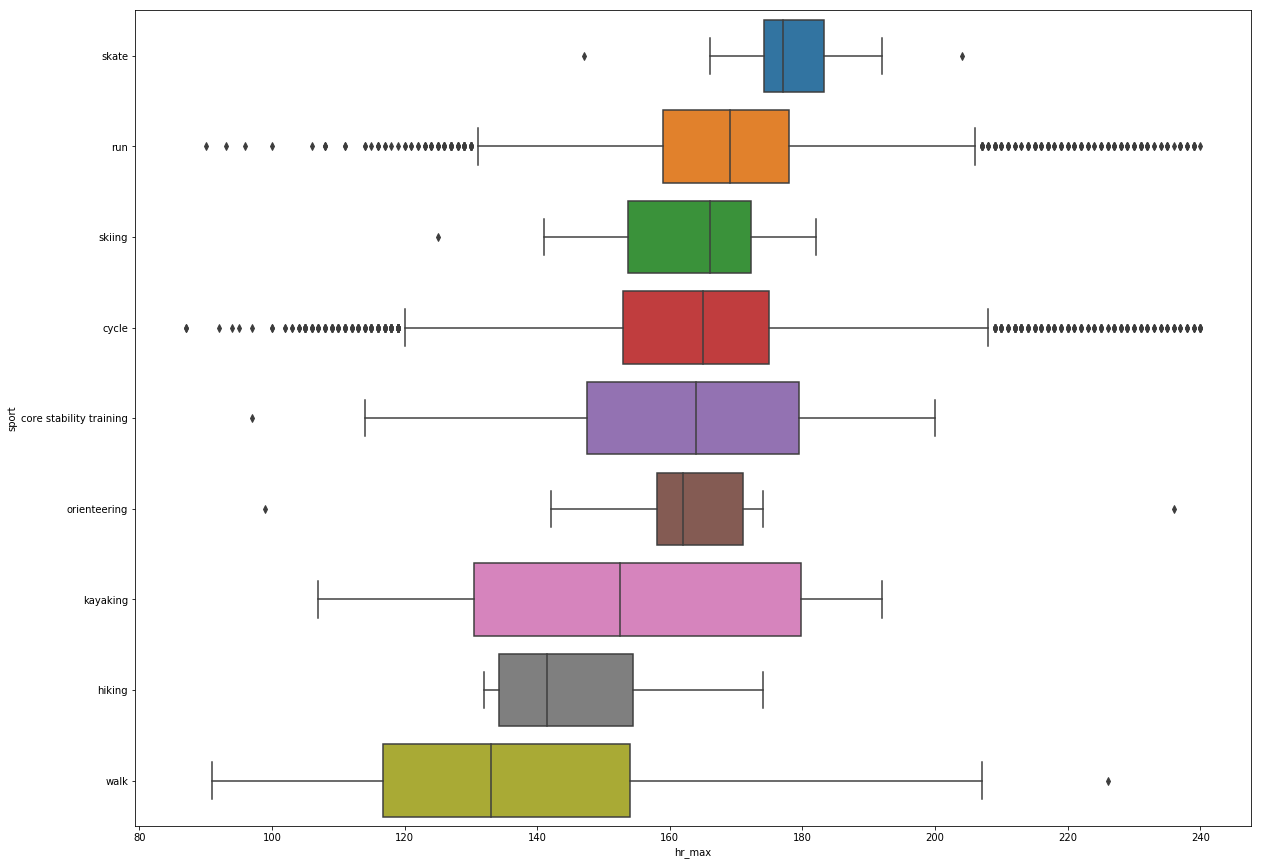

In [15]:
order = df_model.groupby('sport')['hr_max'].median().sort_values(ascending=False).index

plt.figure(figsize=(20,15))
#plt.xlim(0,300)

sns.boxplot(data=df_model,x='hr_max',y='sport',order=order);

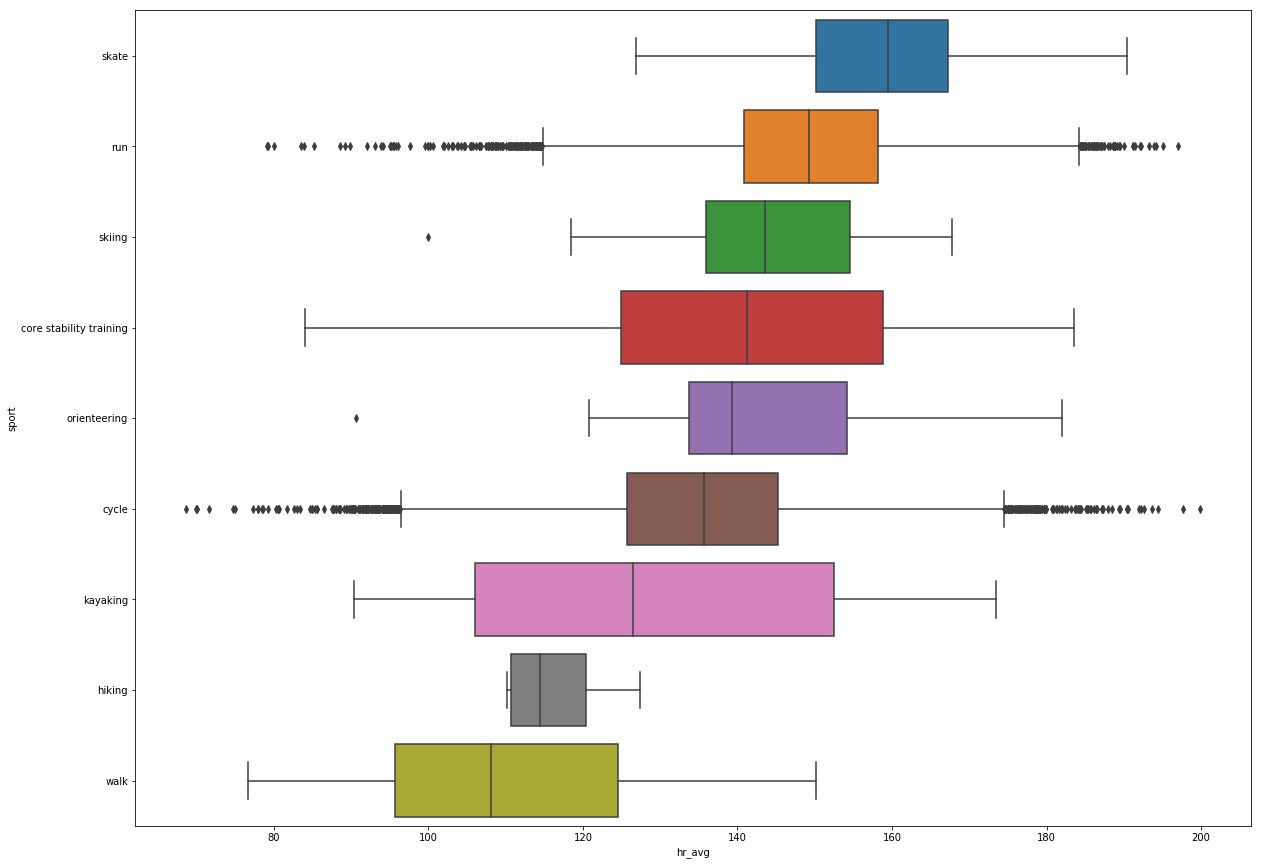

In [16]:
order = df_model.groupby('sport')['hr_avg'].median().sort_values(ascending=False).index

plt.figure(figsize=(20,15))
#plt.xlim(0,300)

sns.boxplot(data=df_model,x='hr_avg',y='sport',order=order);

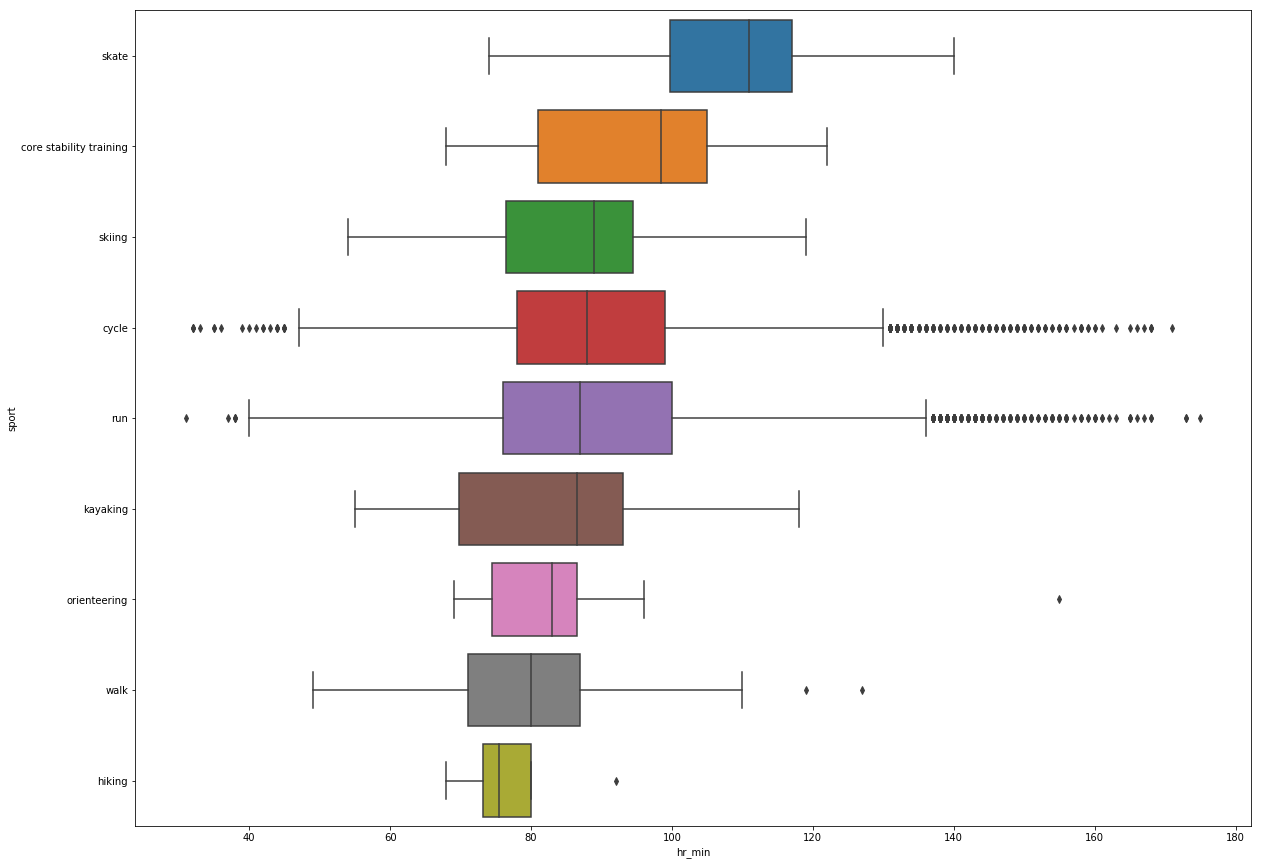

In [17]:
order = df_model.groupby('sport')['hr_min'].median().sort_values(ascending=False).index

plt.figure(figsize=(20,15))
#plt.xlim(0,300)

sns.boxplot(data=df_model,x='hr_min',y='sport',order=order);

### Create Features and Target

In [18]:
target = 'sport'
features = [x for x in df_model.columns if x != target]

X = df_model[features].values
y = df_model[target].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,stratify=y,random_state=3050)

In [19]:
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [20]:
# check

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25336, 10)
(6335, 10)
(25336,)
(6335,)


### Logistic Regresion Model

In [21]:
# init model

logreg = LogisticRegression()

In [22]:
# perform cross validation

score = cross_val_score(logreg,X,y,cv=5)
print('score:',score.mean(),score)

# score: 0.6545580125487176 [0.6302521  0.66461016 0.66203607 0.65096449 0.66492724]

score: 0.982129544225834 [0.97980435 0.97901215 0.98626243 0.98404927 0.98151951]


In [23]:
# fit model

logreg.fit(X_train, y_train)

# score model
print("train r2:",logreg.score(X_train, y_train))
print("test r2:",logreg.score(X_test, y_test))

# validate model
y_pred = logreg.predict(X_test)

# train r2: 0.6561339556433755
# test r2: 0.6566573926868045

train r2: 0.9835017366592991
test r2: 0.9810576164167324


### KNN Model

In [24]:
# init model

knn = KNeighborsClassifier()

#n_neighbors=2
#n_neighbors=3
#n_neighbors=4
#n_neighbors=5

In [25]:
# perform cross validation

score = cross_val_score(knn,X,y,cv=5)
print('score:',score.mean(),score)

# score: 0.6347393701719926 [0.63162286 0.63227229 0.63261291 0.63936675 0.63782204]

score: 0.9836128312977959 [0.98232881 0.98406186 0.98736776 0.98041693 0.9838888 ]


In [26]:
# fit model

knn.fit(X_train, y_train)

# score model
print("train r2:",knn.score(X_train, y_train))
print("test r2:",knn.score(X_test, y_test))

# validate model
y_pred = knn.predict(X_test)

# train r2: 0.7233332197731067
# test r2: 0.6466017488076312

train r2: 0.9885933059677928
test r2: 0.9875295974743489


### DTC Model

In [27]:
# init model

dtc = DecisionTreeClassifier(max_depth=10,random_state=3050)

In [28]:
# perform cross validation

score = cross_val_score(dtc,X,y,cv=5)
print(score.mean(),score)

# 0.6571859387988765 [0.6583527  0.64648903 0.65991951 0.65898453 0.66218392]

0.985601637444341 [0.98548438 0.98721793 0.98878888 0.98089071 0.98562628]


In [29]:
# fit model
dtc = dtc.fit(X_train,y_train)

# score model
print("train r2:",dtc.score(X_train, y_train))
print("test r2:",dtc.score(X_test, y_test))

# validate model
y_pred = dtc.predict(X_test)

# train r2: 0.6839079480802643
# test r2: 0.6640500794912559

train r2: 0.9932112409220082
test r2: 0.9870560378847671


In [30]:
# # initialize the output file object
# dot_data = StringIO() 

# # my fit DecisionTreeRegressor object here is: dtr1
# # for feature_names i put the columns of my Xr matrix
# export_graphviz(dtc, 
#                 out_file=dot_data,  
#                 filled=True, 
#                 rounded=True,
#                 special_characters=True,
#                 feature_names=df_model[features].columns
#                )  

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

### RFC Model

In [31]:
# init model

rfc = RandomForestClassifier(n_estimators=10,max_depth=10,n_jobs=2, random_state=3050)

In [32]:
# perform cross validation

score = cross_val_score(rfc,X,y,cv=5)
print(score.mean(),score)

# 0.6694373441828699 [0.66922939 0.6622556  0.67476524 0.67082079 0.6701157 ]

0.9882858001836624 [0.98721994 0.98895376 0.99131533 0.98610234 0.98783762]


In [33]:
# fit model
rfc = rfc.fit(X_train,y_train)

# score model
print("train r2:",rfc.score(X_train, y_train))
print("test r2:",rfc.score(X_test, y_test))

# validate model
y_pred = rfc.predict(X_test)

# train r2: 0.6894610431642422
# test r2: 0.6760930047694753

train r2: 0.992974423744869
test r2: 0.9886345698500395
